<a href="https://colab.research.google.com/github/kunal077/Task3-NLP/blob/main/Task3NLPCategoryUsingDescription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

1. The following block of code imports some of the major libraries requireed for doing Exploratory Data Analysis and creation of Dataframe to store our Datasets.
2.  Matplotlib is used to visualize the data.

In [ ]:
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd




1.   We used magic function %matplotlib inline to integrate the backend of matplotlib to the 'inline' backend and store it in the notebook itself.
2.   we set suppress property of printoptions to True so that smaller numbers do not get displayed in scientific notation but as normal form.



In [ ]:
%matplotlib inline
np.set_printoptions(suppress = True)



*   The following block of code is used to read the given Dataset (Flipkart eCommerce) and store it in the Google Colab Session Storage.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flipkart-eCommerce-data.csv to flipkart-eCommerce-data (1).csv




*  The .csv file uploaded is made readible by the io.BytesIO funcitonality and a DataFrame is created to store the dataset.




In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['flipkart-eCommerce-data.csv']))
print(df)

                                uniq_id  ...                             product_specifications
0      c2d766ca982eca8304150849735ffef9  ...  {"product_specification"=>[{"key"=>"Number of ...
1      7f7036a6d550aaa89d34c77bd39a5e48  ...  {"product_specification"=>[{"key"=>"Installati...
2      f449ec65dcbc041b6ae5e6a32717d01b  ...  {"product_specification"=>[{"key"=>"Ideal For"...
3      0973b37acd0c664e3de26e97e5571454  ...  {"product_specification"=>[{"key"=>"Number of ...
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  ...  {"product_specification"=>[{"key"=>"Pet Type",...
...                                 ...  ...                                                ...
19995  7179d2f6c4ad50a17d014ca1d2815156  ...  {"product_specification"=>[{"key"=>"Number of ...
19996  71ac419198359d37b8fe5e3fffdfee09  ...  {"product_specification"=>[{"key"=>"Number of ...
19997  93e9d343837400ce0d7980874ece471c  ...  {"product_specification"=>[{"key"=>"Number of ...
19998  669e79b8fa5d9ae020841c0c97d5e935 

# Exploratory Data Analysis 
Here we first process the data, visualize it, find the appropriate fields of data to be used in our Machine Learning model.

To ger the information about the number fo data items in each column, what type of column itis and the shape of the whole dataset.

In [ ]:
print(df.info(), "\n", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

Then we find the number of null values in our Dataset so that they do not created problems further down the line in our NLP Task

In [ ]:
print(df.isnull().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64


The following blocks are some of the basic EDA to better understand the data and what do we need to do.

In [ ]:
df.duplicated().value_counts()

False    20000
dtype: int64

In [ ]:
df['crawl_timestamp']

0        2016-03-25 22:59:23 +0000
1        2016-03-25 22:59:23 +0000
2        2016-03-25 22:59:23 +0000
3        2016-03-25 22:59:23 +0000
4        2016-03-25 22:59:23 +0000
                   ...            
19995    2015-12-01 10:15:43 +0000
19996    2015-12-01 10:15:43 +0000
19997    2015-12-01 10:15:43 +0000
19998    2015-12-01 10:15:43 +0000
19999    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 20000, dtype: object

To understand and visualise where all the values are mission, we used seaborn library to create a plot that roughlt estimate the amount and places of null values in the dataset.

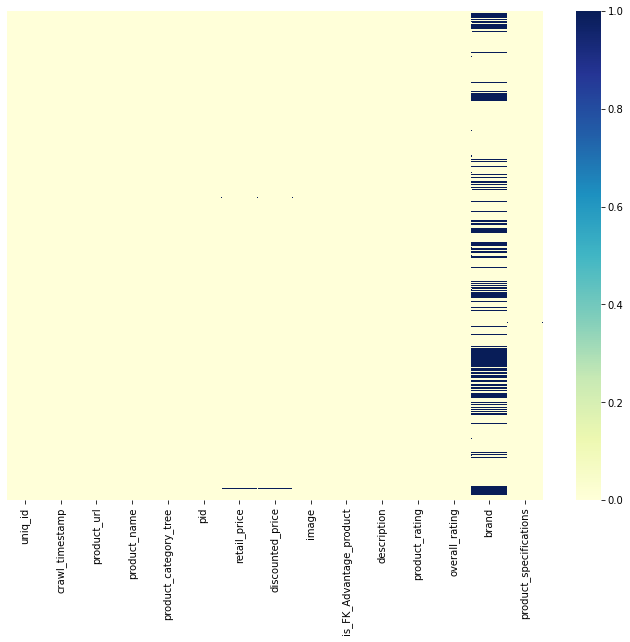

In [ ]:
import seaborn as sns
plt.figure(figsize =(12, 9))
sns.heatmap(df.isnull(),yticklabels=False,cmap='YlGnBu',cbar=True)

As to understand the data better and visualize it and see what type of values are there in some of the major parameters such as the name of the product the category it belongs to, description and specification of our product.

In [ ]:
print(df.columns, "\n")
print(df['product_name'], "\n")
print(df['product_category_tree'], "\n")
print(df['description'], "\n")
print(df['product_specifications'], "\n")

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object') 

0            Alisha Solid Women's Cycling Shorts
1            FabHomeDecor Fabric Double Sofa Bed
2                                     AW Bellies
3            Alisha Solid Women's Cycling Shorts
4          Sicons All Purpose Arnica Dog Shampoo
                          ...                   
19995             WallDesign Small Vinyl Sticker
19996    Wallmantra Large Vinyl Stickers Sticker
19997    Elite Collection Medium Acrylic Sticker
19998    Elite Collection Medium Acrylic Sticker
19999    Elite Collection Medium Acrylic Sticker
Name: product_name, Length: 20000, dtype: object 

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >

We CLEAN the data and create a new DataFrame that extracts the feature required to create our model and not using the features that are not useful.

In [ ]:
req_df = df[['product_name', 'product_category_tree', 'description', 'product_specifications']]
print(req_df.columns)

Index(['product_name', 'product_category_tree', 'description',
       'product_specifications'],
      dtype='object')


In the following block of code, we tried to see how the Product_Category_Tree is made.
In this we can clearly see that all products have the Root/Primary/Category1 atleast to describe it, afterwards some of the products have a deeper tree and some of them do not.

---

This makes the intuition that we should be using Primart/Category1/Root of this tree as our Y data.

In [ ]:
#Understandin properties of product_category_tree
for i in range(100):
  print(df['product_category_tree'][i])

["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts"]
["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]
["Footwear >> Women's Footwear >> Ballerinas >> AW Bellies"]
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts"]
["Pet Supplies >> Grooming >> Skin & Coat Care >> Shampoo >> Sicons All Purpose Arnica Dog Shampoo (500 ml)"]
["Eternal Gandhi Super Series Crystal Paper Weight..."]
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts"]
["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]
["Footwear >> Women's Footwear >> Ballerinas >> dilli bazaaar Bellies, Corporate Casuals, Casuals"]
["Clothing >> Women's Clothing >> Lingerie, Sleep & Sw

As part of CLEANING the data, we understand that the Procut Description is the primary X data, since it contains most important details of what the product is.

---

But this Desciption contains many punctuations, Stop Words and other unimportant symbols.
For that we define the following function named processed_text which create the str type description for all of our Products.


---

The process text from here is going to be used in out DataFrame as df['description']


In [ ]:
import re
def processed_text(text):
    """
    Input: Unprocessed Description of Products
    Return: Processed string of text, all in lowercasem without 
    punctuations and symbols.     
    
    """
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    #Lowercasing Text so that we can standardize across all
    text = text.strip().lower()
    
    #removing punctuations using Regular Expressions and putting in Space.
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [ ]:
print(type(df['description']))

<class 'pandas.core.series.Series'>


As part of CLEANING our data, we have already seen that there are many sub-categories of the tree but as we go down they become less meaningful.

---

So I created a series of functions to extract the most categories until category4, at any step if the category is not founded then it is simply put as 'None' using Try-Except Block

In [ ]:
#Since all products will have some category1 categories but we are not sure about 
#The coming categoires so we Try_Except method to derive the maximum category
def category1_category(value_of_the_category):
  return value_of_the_category.split('>>')[0][1:len(value_of_the_category.split('>>')[0])-1]

def category2_category(value_of_the_category):
  try:
    return value_of_the_category.split('>>')[1][1:len(value_of_the_category.split('>>')[1])-1]
  except IndexError:
    return 'None'       
def category3_category(value_of_the_category):
  try:
    return value_of_the_category.split('>>')[2][1:len(value_of_the_category.split('>>')[2])-1]
  except IndexError:
    return 'None'
def category4_category(value_of_the_category):
   try:
     return value_of_the_category.split('>>')[3][1:len(value_of_the_category.split('>>')[3])-1]
   except IndexError:
     return 'None'

At this point we have created our new req_df or Required Dataframe which contains the values of the important attributes for machine learning.


---

Into this req_df we add the 4 categories of each Product in the dataframe so that we have a list of all the values of categories for all the products.

In [ ]:
req_df['category1'] = req_df['product_category_tree'].apply(category1_category)
req_df['category2']=req_df['product_category_tree'].apply(category2_category)
req_df['category3']=req_df['product_category_tree'].apply(category3_category)
req_df['category4']=req_df['product_category_tree'].apply(category4_category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

As part of VISUALIZING some of the data, I create a bar plot that shows what are some of the most improtant categories and what we can expect most when we are going to create classifier.

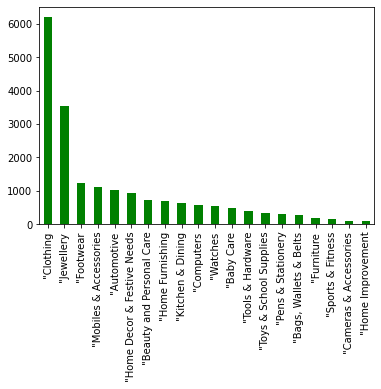

In [ ]:
req_df['category1'].value_counts()[:20].sort_values(ascending=False).plot(kind='bar', color= 'green')

At this point we have our new req_df ready, so we view it finally before applying NLP and Machine Learning Tasks.

In [ ]:
print(req_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            20000 non-null  object
 1   product_category_tree   20000 non-null  object
 2   description             19998 non-null  object
 3   product_specifications  19986 non-null  object
 4   category1               20000 non-null  object
 5   category2               20000 non-null  object
 6   category3               20000 non-null  object
 7   category4               20000 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB
None


In [ ]:
print(req_df.shape)

(20000, 8)


In [ ]:
print(req_df)

                                  product_name  ...                                          category4
0          Alisha Solid Women's Cycling Shorts  ...                                             Shorts
1          FabHomeDecor Fabric Double Sofa Bed  ...  FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2                                   AW Bellies  ...                                        AW Bellies"
3          Alisha Solid Women's Cycling Shorts  ...                                             Shorts
4        Sicons All Purpose Arnica Dog Shampoo  ...                                            Shampoo
...                                        ...  ...                                                ...
19995           WallDesign Small Vinyl Sticker  ...                               WallDesign Stickers"
19996  Wallmantra Large Vinyl Stickers Sticker  ...                               Wallmantra Stickers"
19997  Elite Collection Medium Acrylic Sticker  ...                      

Preprocessing and Vizualization completed


---



Now we create Model for predicting outcome produt 
category based on the product description.

The model I have selected is NAIVE BAYES classifier since In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. So we can think that in terms of probability that one type of description makes correpsonding type of product category.



---

We are going to use Naive Bayes
In sklearn library we have module named MultunomialNB.
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [ ]:
import nltk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import classification_report, confusion_matrix

At this point I have also tried to use LabelEncoder but finally I have decided to use description as the main feature for predicting outcome.

In [ ]:
# from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
# req_df['description'] = req_df['description'].astype('str').apply(preprocess_string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# labelEncoder = preprocessing.LabelEncoder()
# category_encoded = labelEncoder.fit_transform(req_df['category1'])
# req_df['category1'] = category_encoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Using train_test_split from skelarn.modelselection we first divided the data into 80:20 Training and Testing data.

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(req_df['description'], 
                                                req_df['category1'],
                                                test_size = 0.2)

In [ ]:
print(xTrain, yTrain, "\n")
print(xTest, yTest)

print(req_df['category1'])

8150     Key Features of Speedwav 220165 Bike Handle Gr...
14230    Ocean Race Solid Men's Round Neck T-Shirt - Bu...
12677    Anasazi Women's Printed Casual Shirt - Buy Mul...
15373    Surat Diamonds Ruby Sterling Silver Pendant - ...
15853    Flipkart.com: Buy Fabme Women Wedges only for ...
                               ...                        
10697    Key Features of Anuradha Art Silver Polished B...
5756     Flipkart.com: Buy Pinnakle Dual Compartment an...
17736    Specifications of Siemens 5SL Betagard 5SL MCB...
10175    Key Features of Marc N' Park Men's Solid Casua...
2224     PrivateLifes Polka Lace Women's T-Shirt Bra\n ...
Name: description, Length: 16000, dtype: object 8150                            "Automotive
14230                             "Clothing
12677                             "Clothing
15373                            "Jewellery
15853                             "Footwear
                        ...                
10697                            "Jewel

Here we use CountVectorizer which convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.



---

Initially I passed the xTrain as the value but since the requirement is differnt I have to convert it to astype('U') which tells numpy to convert it into Unicode.

In [ ]:
vector = CountVectorizer(stop_words='english')
xTrainMat = vector.fit_transform(xTrain.values.astype('U'))
print(xTrain)

8150     Key Features of Speedwav 220165 Bike Handle Gr...
14230    Ocean Race Solid Men's Round Neck T-Shirt - Bu...
12677    Anasazi Women's Printed Casual Shirt - Buy Mul...
15373    Surat Diamonds Ruby Sterling Silver Pendant - ...
15853    Flipkart.com: Buy Fabme Women Wedges only for ...
                               ...                        
10697    Key Features of Anuradha Art Silver Polished B...
5756     Flipkart.com: Buy Pinnakle Dual Compartment an...
17736    Specifications of Siemens 5SL Betagard 5SL MCB...
10175    Key Features of Marc N' Park Men's Solid Casua...
2224     PrivateLifes Polka Lace Women's T-Shirt Bra\n ...
Name: description, Length: 16000, dtype: object


Then we create a Classifer using MutinomialNB() which is Naive Bayes Classifer.


---

Then we used score() method to calculate the resutlts and print out classification report which shows the Recall, Precision and Accuracy of the model.


---

Using NB and 80:20 Ratio we get 90% Accuracy with description as main feature and procuct category as our Goal.


In [ ]:
clf = MultinomialNB()
clf.fit(xTrainMat, yTrain)

print(clf.score(xTrainMat, yTrain))

xTestMat = vector.transform(xTest.values.astype('U'))
print(clf.score(xTestMat, yTest))

predicted_result = clf.predict(xTestMat)
print(classification_report(yTest, predicted_result))

0.930875
0.903
                                                       precision    recall  f1-score   support

          "ABEEZ Boys, Men, Girls (Black, Pack of 1)"       0.00      0.00      0.00         1
                         "ANAND ARCHIES Girls Wedges"       0.00      0.00      0.00         1
        "ATV Pouch for Acer Liquid Z330 (STEEL BLUE)"       0.00      0.00      0.00         1
            "Ajaero Slim Fit Women's Dark Blue Jeans"       0.00      0.00      0.00         1
                                          "Automotive       0.92      0.99      0.96       184
                 "Autoplus M AP15 Arm Sleeve (Black)"       0.00      0.00      0.00         1
                 "Autoplus M AP18 Arm Sleeve (Black)"       0.00      0.00      0.00         1
                                           "Baby Care       0.89      0.54      0.67       109
                               "Bags, Wallets & Belts       0.70      0.56      0.62        57
                            "Beaut

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Seeing the positive Result from the above mentioned codes, I decide to build a function named buildAndTestModel_20 which takes Categories (all type namely 1, 2, 3 and 4..) and test our model on prediction of corresponding categories as Description as Main Feature.

In [ ]:
#Buildging a Wrapper around the model, we can start predicting Category2 
#and category 3 models.

def buildAndTestModel_20(cat):
  """Input:The category against which we want to test model.
            here we can pass Category1, 2, 3, 4...
            
     Return: The function creates the model using NB and predict the category passed
              above against our main feature description
  """
  xTrain, xTest, yTrain, yTest = train_test_split(req_df['description'], 
                                                req_df[cat],
                                                test_size = 0.2)
  vector = CountVectorizer(stop_words='english')
  xTrainMat = vector.fit_transform(xTrain.values.astype('U'))
  #print(xTrainMat)
  clf = MultinomialNB()
  clf.fit(xTrainMat, yTrain)

  print(clf.score(xTrainMat, yTrain))

  xTestMat = vector.transform(xTest)
  print(clf.score(xTestMat, yTest))

  predicted_result = clf.predict(xTestMat)
  print(classification_report(yTest, predicted_result))

We can clearly see in the code below that we should not be using category2 and subsequent for prediction because the accuracy of the model decreases rapidly.


---

Hence the Primary Category or Category1 is the predicted value using description.




In [ ]:
for i in range(4):
  cat = 'category' + str(i+1)
  buildAndTestModel_20(cat)

0.9293125
0.91225
                                                       precision    recall  f1-score   support

        "ATV Pouch for Acer Liquid Z330 (STEEL BLUE)"       0.00      0.00      0.00         1
"Adidas IND PRO THI GUA Thigh Guard (White, Blue,..."       0.00      0.00      0.00         1
            "Ajaero Slim Fit Women's Dark Blue Jeans"       0.00      0.00      0.00         1
  "Attitude Printed Women's Round Neck Black T-Shirt"       0.00      0.00      0.00         1
                                          "Automotive       0.91      0.98      0.94       211
     "BALAJI EXPORTS Bottled Wine Cooler (9 Bottles)"       0.00      0.00      0.00         1
                   "BLM Casual Printed Women's Kurti"       0.00      0.00      0.00         1
                                           "Baby Care       0.87      0.65      0.75       106
                               "Bags, Wallets & Belts       0.88      0.66      0.76        56
 "Be 13 Printed Boy's Round Nec

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8703125
0.827
                                                      precision    recall  f1-score   support

                            AAO+ Aviator Sunglasses"       0.00      0.00      0.00         1
                                      Academic Texts       0.00      0.00      0.00         2
                                         Accessories       1.00      1.00      1.00        19
                           Accessories & Spare parts       0.80      0.95      0.87       172
                                      Action Figures       1.00      1.00      1.00         5
                                             Anklets       0.00      0.00      0.00         1
                                Artificial Jewellery       0.00      0.00      0.00         1
                                       Audio Players       0.00      0.00      0.00         1
                                   Baby & Kids Gifts       0.98      0.95      0.97        44
                                    Baby Ba

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7729375
0.70625


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                      precision    recall  f1-score   support

       ABCD XL Bean Bag  With Foam Filling (Orange)"       0.00      0.00      0.00         1
                                    AKUP Coffee Mugs       0.67      1.00      0.80         6
                                AMY Office Supplies"       0.00      0.00      0.00         5
                                         Accessories       1.00      0.25      0.40         4
                            Accessories & Combo Sets       0.90      0.38      0.53        24
                                            Adapters       1.00      0.91      0.95        11
                                 Adino Wrist Watches       0.00      0.00      0.00         1
                         AdraxX Remote Control Toys"       0.00      0.00      0.00         1
                  Airwind Musical Instruments & Toys       0.00      0.00      0.00         1
                                    Animal Figurines       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


To see the different results I build similar function as created above but the Train:Test Ratio becomes 90:10

In [ ]:
def buildAndTestModel_10(cat):
    """Input:The category against which we want to test model.
            here we can pass Category1, 2, 3, 4...
            
     Return: The function creates the model using NB and predict the category passed
              above against our main feature description
  """
  xTrain, xTest, yTrain, yTest = train_test_split(req_df['description'], 
                                                req_df[cat],
                                                test_size = 0.1)
  vector = CountVectorizer(stop_words='english')
  xTrainMat = vector.fit_transform(xTrain.values.astype('U'))
  #print(xTrainMat)
  clf = MultinomialNB()
  clf.fit(xTrainMat, yTrain)

  print(clf.score(xTrainMat, yTrain))

  xTestMat = vector.transform(xTest)
  print(clf.score(xTestMat, yTest))

  predicted_result = clf.predict(xTestMat)
  print(classification_report(yTest, predicted_result))

The below results show that if we take 10% of the data as Test Data, then in general the accuracy of the model decreases slowly as compared to the case in which we take 20% of data as Test Data, this is understandable since in latter we have more training points.

In [ ]:
for i in range(4):
  cat = 'category' + str(i+1)
  buildAndTestModel_10(cat)

0.9347777777777778
0.908


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                       precision    recall  f1-score   support

                           "Arial Morris Women Flats"       0.00      0.00      0.00         1
                                          "Automotive       0.91      1.00      0.95       105
                                           "Baby Care       0.81      0.50      0.62        44
                               "Bags, Wallets & Belts       0.73      0.64      0.68        25
                            "Beauty and Personal Care       0.79      0.91      0.84        77
                             "Breakbounce Men's Vest"       0.00      0.00      0.00         1
                               "Cameras & Accessories       1.00      0.14      0.25         7
                                            "Clothing       0.95      0.99      0.97       641
                   "Clovia Women's Full Coverage Bra"       0.00      0.00      0.00         2
                                           "Compu

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                        precision    recall  f1-score   support

                        Academic Texts       0.00      0.00      0.00         1
                           Accessories       0.92      0.92      0.92        13
             Accessories & Spare parts       0.87      1.00      0.93       109
                        Action Figures       0.80      0.67      0.73         6
         Aligatorr Aviator Sunglasses"       0.00      0.00      0.00         1
                          Art Supplies       0.00      0.00      0.00         1
                  Artificial Jewellery       0.00      0.00      0.00         1
                     Baby & Kids Gifts       0.90      1.00      0.95        19
                      Baby Bath & Skin       0.00      0.00      0.00         3
                          Baby Bedding       0.00      0.00      0.00         2
                                  Bags       0.65      0.58      0.61        19
          Bangles, Bracelets & Armlets 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.711
0.636
                                                      precision    recall  f1-score   support

                                       4D Batteries"       0.00      0.00      0.00         2
                                  999store Stickers"       0.00      0.00      0.00         4
                                   @home Flower Vase       0.00      0.00      0.00         1
AKUP dad-a-daughters-first-love Ceramic Mug (300..."       0.00      0.00      0.00         1
     AKUP happy-new-year-love- Ceramic Mug (300 ml)"       0.00      0.00      0.00         1
         AKUP without-the-rain Ceramic Mug (300 ml)"       0.00      0.00      0.00         1
                               ALL DAY 365 Hand Bags       0.00      0.00      0.00         1
 AM Creation Magic  Ceramic Mug (273 ml, Pack of 2)"       0.00      0.00      0.00         1
                               AMZER Cases & Covers"       0.00      0.00      0.00         1
                        AOC Geometry & Pencil B

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is a similar function with 95:5 Train:Test Split.

In [ ]:
def buildAndTestModel_5(cat):
    """Input:The category against which we want to test model.
            here we can pass Category1, 2, 3, 4...
            
     Return: The function creates the model using NB and predict the category passed
              above against our main feature description
  """
  xTrain, xTest, yTrain, yTest = train_test_split(req_df['description'], 
                                                req_df[cat],
                                                test_size = 0.05)
  vector = CountVectorizer(stop_words='english')
  xTrainMat = vector.fit_transform(xTrain.values.astype('U'))
  #print(xTrainMat)
  clf = MultinomialNB()
  clf.fit(xTrainMat, yTrain)

  print(clf.score(xTrainMat, yTrain))

  xTestMat = vector.transform(xTest)
  print(clf.score(xTestMat, yTest))

  predicted_result = clf.predict(xTestMat)
  print(classification_report(yTest, predicted_result))

In this case we took 95% as Training data, this makes the model to overfit on the Training data making it less efficient on Test Data.

In [ ]:
for i in range(4):
  cat = 'category' + str(i+1)
  buildAndTestModel_5(cat)

0.9347368421052632
0.915
                                                        precision    recall  f1-score   support

             "Ajaero Slim Fit Women's Dark Blue Jeans"       0.00      0.00      0.00         1
               "Anuradha Art Stylish Hair Clip (Blue)"       0.00      0.00      0.00         1
                                           "Automotive       0.90      1.00      0.95        52
                                            "Baby Care       0.94      0.59      0.73        27
                                "Bags, Wallets & Belts       0.82      0.56      0.67        16
                             "Beauty and Personal Care       0.82      0.85      0.84        48
                                "Cameras & Accessories       0.50      0.20      0.29         5
                                             "Clothing       0.95      0.99      0.97       317
                    "Clovia Women's Full Coverage Bra"       0.00      0.00      0.00         2
              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8706842105263158
0.813
                                        precision    recall  f1-score   support

                           Accessories       1.00      1.00      1.00         9
             Accessories & Spare parts       0.68      0.94      0.79        32
                        Action Figures       1.00      1.00      1.00         1
                         Audio Players       0.00      0.00      0.00         1
                     Baby & Kids Gifts       1.00      1.00      1.00        10
                      Baby Bath & Skin       0.00      0.00      0.00         2
                         Baby Grooming       0.00      0.00      0.00         2
                                  Bags       0.44      0.50      0.47         8
                              Bakeware       0.00      0.00      0.00         1
          Bangles, Bracelets & Armlets       0.83      0.83      0.83        35
                       Bar & Glassware       0.00      0.00      0.00         1
              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7778421052631579
0.708


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                      precision    recall  f1-score   support

                                AMY Office Supplies"       1.00      0.50      0.67         2
                                         Accessories       0.00      0.00      0.00         1
                            Accessories & Combo Sets       0.00      0.00      0.00         2
                                            Adapters       0.50      1.00      0.67         1
              Aimedu Toy Learning & Educational Toys       0.00      0.00      0.00         1
                                    Animal Figurines       0.00      0.00      0.00         1
                                Apkamart Showpieces"       0.00      0.00      0.00         1
               Aria Rhodium Sterling Silver Pendant"       0.00      0.00      0.00         1
                                   Artificial Plants       0.50      1.00      0.67         1
                                      Baby Bedsheets       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I install clana for understanding Confusion Matrix better.

In [ ]:
!pip install clana --user

     |████████████████████████████████| 645kB 7.1MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


This is the final and most useful model that we created, the model is based on previous builAndTestModel_20.

In [ ]:
def buildAndTestModelAdditional_20(cat):
    """Input:The category against which we want to test model.
            here we can pass Category1, 2, 3, 4...
            
     Return: The function creates the model using NB and predict the category passed
              above against our main feature description
  """
  xTrain, xTest, yTrain, yTest = train_test_split(req_df['description'], 
                                                req_df[cat],
                                                test_size = 0.2)
  vector = CountVectorizer(stop_words='english')
  xTrainMat = vector.fit_transform(xTrain.values.astype('U'))
  #print(xTrainMat)
  clf = MultinomialNB()
  clf.fit(xTrainMat, yTrain)

  print(clf.score(xTrainMat, yTrain))

  xTestMat = vector.transform(xTest)
  print(clf.score(xTestMat, yTest))

  predicted_result = clf.predict(xTestMat)
  print(classification_report(yTest, predicted_result))

  conf_mat = confusion_matrix(
        yTest, predicted_result, labels = df['category1'])
  
  ticks=np.linspace(0, 89,num=90)
  plt.imshow(conf_mat, interpolation='none')
  plt.colorbar()
  plt.xticks(ticks,fontsize=6)
  plt.yticks(ticks,fontsize=6)
  plt.grid(True)
  plt.show()  
  

Further I tried using TfidVectorizer instead of CountVectorizer but the model's accuracy decreased.


---



In [42]:
#Instead of using Label Encoder for the category, noew let us use TFIDF
#we convert the training data to Tf-Idf form

vector = TfidfVectorizer(stop_words = "english")
xTrainTfidf = vector.fit_transform(xTrain.values.astype('U'))

In [45]:
#Training, Predicting and scoring the test data
clf_tfidf = MultinomialNB()
clf_tfidf.fit(xTrainTfidf, yTrain)
print(clf_tfidf.score(xTrainTfidf, yTrain))

xTestTfidf = vector.transform(xTest.values.astype('U'))
print(clf_tfidf.score(xTestTfidf, yTest))

0.868375
0.85775


To finalize the previously created classifer using buildAndTestAdditional_20 model, I tried to explicitly check what values are shown.

---

When I type "Good Color", model returns Category "Clothing", which I am unable to print but it can be seen in the error message.
Similary for description "Wood Quality", classifer returns "Home Decor and Festive".

In [ ]:
labelEncoder.inverse_transform(clf.predict(vector.transform(['good color'])))

ValueError: ignored

In [ ]:
labelEncoder.inverse_transform(clf.predict(vector.transform(['wood quality is great'])))

ValueError: ignored

To IMROVE the accuracy of the classifer.


---

I thought of using PRODUCT_SPECIFICATION instead of DESCRIPTION as our main feature.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

New DataFrame is created with product_specification as main feature and Product_category Tree as our Goal.

In [ ]:
new_df = df[['product_category_tree', 'product_specifications']]
new_df['category1'] = df['product_category_tree'].apply(category1_category)
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_category_tree   20000 non-null  object
 1   product_specifications  19986 non-null  object
 2   category1               20000 non-null  object
dtypes: object(3)
memory usage: 468.9+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df['product_specifications'])
print(type(df['product_specifications']))

print(df['product_specifications'][0])

0        {"product_specification"=>[{"key"=>"Number of ...
1        {"product_specification"=>[{"key"=>"Installati...
2        {"product_specification"=>[{"key"=>"Ideal For"...
3        {"product_specification"=>[{"key"=>"Number of ...
4        {"product_specification"=>[{"key"=>"Pet Type",...
                               ...                        
19995    {"product_specification"=>[{"key"=>"Number of ...
19996    {"product_specification"=>[{"key"=>"Number of ...
19997    {"product_specification"=>[{"key"=>"Number of ...
19998    {"product_specification"=>[{"key"=>"Number of ...
19999    {"product_specification"=>[{"key"=>"Number of ...
Name: product_specifications, Length: 20000, dtype: object
<class 'pandas.core.series.Series'>
{"product_specification"=>[{"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 3"}, {"key"=>"Fabric", "value"=>"Cotton Lycra"}, {"key"=>"Type", "value"=>"Cycling Shorts"}, {"key"=>"Pattern", "value"=>"Solid"}, {"key"=>"Ideal For", "value"=>"Wo

---
Finally the model created using Naive Bayes 
Classification using 80:20 Train:Test and Product_Specification as our main feature results BETTER ACCURACY in prediction of Product Categories. 


---



We get 92% Accuracy which is better than 91% accuracy achieved using Description using Main Feature.

0.92875
0.92
                                                       precision    recall  f1-score   support

                          "ANAND ARCHIES Girls Flats"       0.00      0.00      0.00         1
        "ATV Pouch for Acer Liquid Z330 (STEEL BLUE)"       0.00      0.00      0.00         1
"Adidas IND PRO THI GUA Thigh Guard (White, Blue,..."       0.00      0.00      0.00         1
                                          "Automotive       0.91      0.96      0.94       188
                                           "Baby Care       0.89      0.46      0.60        92
                               "Bags, Wallets & Belts       0.86      0.86      0.86        56
                            "Beauty and Personal Care       0.97      0.94      0.96       152
             "Behringer Xenyx 502 Analog Sound Mixer"       0.00      0.00      0.00         1
"Bengal Blooms Rose Artificial Plant  with Pot (3..."       0.00      0.00      0.00         1
                               "Came

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


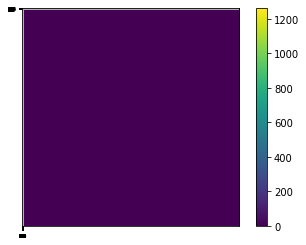

In [ ]:
  xTrain, xTest, yTrain, yTest = train_test_split(new_df['product_specifications'], 
                                                new_df['category1'],
                                                test_size = 0.2)
  vector = CountVectorizer(stop_words='english')
  xTrainMat = vector.fit_transform(xTrain.values.astype('U'))
  #print(xTrainMat)
  clf = MultinomialNB()
  clf.fit(xTrainMat, yTrain)

  print(clf.score(xTrainMat, yTrain))

  xTestMat = vector.transform(xTest.values.astype('U'))
  print(clf.score(xTestMat, yTest))

  predicted_result = clf.predict(xTestMat)
  print(classification_report(yTest, predicted_result))

  conf_mat = confusion_matrix(yTest, predicted_result, labels = new_df['category1'])
  
  ticks=np.linspace(0, 89,num=90)
  plt.imshow(conf_mat, interpolation='none')
  plt.colorbar()
  plt.xticks(ticks,fontsize=6)
  plt.yticks(ticks,fontsize=6)
  plt.grid(True)
  plt.show()
